In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [45]:
# Load the datasets
df_fam_amostra_100mil_limpa = pd.read_csv('df_fam_amostra_100mil_limpa.csv')

In [46]:
df_fam_amostra_100mil_limpa.head()

,cd_ibge,uf_ibge,regiao_ibge,estrato,classf,id_familia,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,...,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,peso.fam,dias_cadastramento,dias_atualizacao,classe_renda
0,4212908,42,5,1,2,268503,1.0,1.0,5.0,2.0,...,1.0,1.0,2.0,2.0,0.0,4,5502526707828,5128.0,102,0.0
1,2931905,29,2,2,3,2888440,2.0,1.0,2.0,1.0,...,1.0,3.0,2.0,2.0,0.0,2,550282046697327,2646.0,151,0.0
2,3527207,35,4,2,3,2113517,1.0,1.0,5.0,2.0,...,1.0,1.0,2.0,2.0,0.0,2,550109644973309,5979.0,482,2.0
3,1501402,15,1,2,1,4747164,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,0.0,5,550249924045052,964.0,964,0.0
4,3303500,33,4,2,2,4419096,1.0,1.0,3.0,1.0,...,1.0,1.0,2.0,2.0,0.0,2,550245146328323,238.0,238,0.0


In [47]:
df_fam_amostra_100mil_limpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99949 entries, 0 to 99948
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cd_ibge                        99949 non-null  int64  
 1   uf_ibge                        99949 non-null  int64  
 2   regiao_ibge                    99949 non-null  int64  
 3   estrato                        99949 non-null  int64  
 4   classf                         99949 non-null  int64  
 5   id_familia                     99949 non-null  int64  
 6   cod_local_domic_fam            99949 non-null  float64
 7   cod_especie_domic_fam          99949 non-null  float64
 8   qtd_comodos_domic_fam          99949 non-null  float64
 9   qtd_comodos_dormitorio_fam     99949 non-null  float64
 10  cod_material_piso_fam          99949 non-null  float64
 11  cod_material_domic_fam         99949 non-null  float64
 12  cod_agua_canalizada_fam        99949 non-null 

In [48]:
df_fam_amostra_100mil_limpa.columns

Index(['cd_ibge', 'uf_ibge', 'regiao_ibge', 'estrato', 'classf', 'id_familia',
       'cod_local_domic_fam', 'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'qtd_comodos_dormitorio_fam', 'cod_material_piso_fam',
       'cod_material_domic_fam', 'cod_agua_canalizada_fam',
       'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'qtde_pessoas', 'peso.fam', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda'],
      dtype='object')

In [49]:
# Converter colunas numéricas que representam categorias para o tipo 'string'
cols_to_convert = [
     'cod_local_domic_fam', 'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'qtd_comodos_dormitorio_fam', 'cod_material_piso_fam',
       'cod_material_domic_fam', 'cod_agua_canalizada_fam',
       'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'dias_cadastramento'
]

# Aplicando a conversão
for col in cols_to_convert:
    df_fam_amostra_100mil_limpa[col] = df_fam_amostra_100mil_limpa[col].astype('str')


In [50]:
df_fam_amostra_100mil_limpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99949 entries, 0 to 99948
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cd_ibge                        99949 non-null  int64  
 1   uf_ibge                        99949 non-null  int64  
 2   regiao_ibge                    99949 non-null  int64  
 3   estrato                        99949 non-null  int64  
 4   classf                         99949 non-null  int64  
 5   id_familia                     99949 non-null  int64  
 6   cod_local_domic_fam            99949 non-null  object 
 7   cod_especie_domic_fam          99949 non-null  object 
 8   qtd_comodos_domic_fam          99949 non-null  object 
 9   qtd_comodos_dormitorio_fam     99949 non-null  object 
 10  cod_material_piso_fam          99949 non-null  object 
 11  cod_material_domic_fam         99949 non-null  object 
 12  cod_agua_canalizada_fam        99949 non-null 

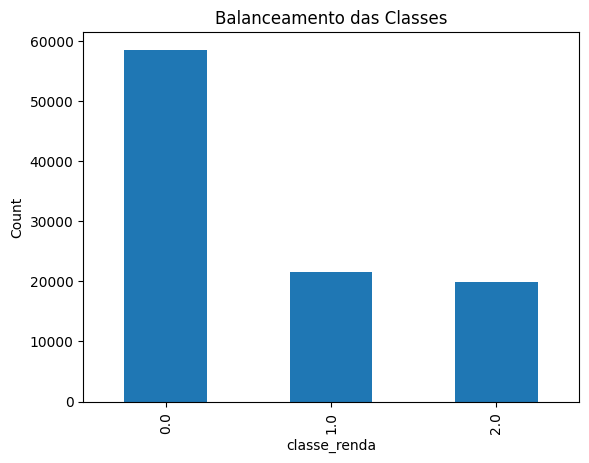

In [51]:
# Gráfico de barras para verificar balanceamento das classes
df_fam_amostra_100mil_limpa['classe_renda'].value_counts().plot(kind='bar')
plt.xlabel('classe_renda')
plt.ylabel('Count')
plt.title('Balanceamento das Classes')
plt.show()

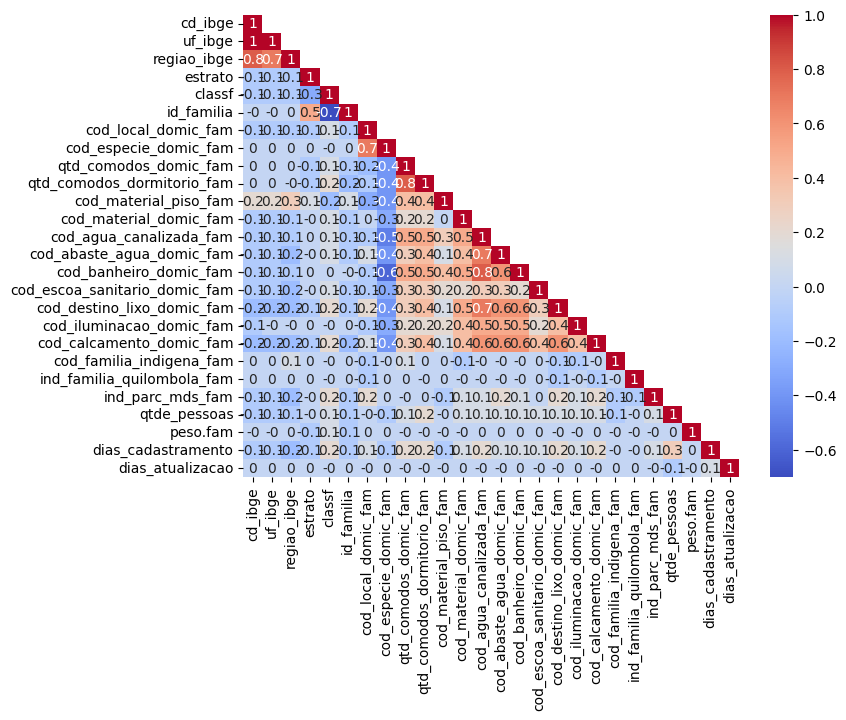

In [52]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_fam_amostra_100mil_limpa.iloc[:, :-1]
mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)
plt.figure(figsize=(8,6))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

# Seleção das variáveis independentes (Features)

In [53]:
df_fam_amostra_100mil_limpa.columns

Index(['cd_ibge', 'uf_ibge', 'regiao_ibge', 'estrato', 'classf', 'id_familia',
       'cod_local_domic_fam', 'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'qtd_comodos_dormitorio_fam', 'cod_material_piso_fam',
       'cod_material_domic_fam', 'cod_agua_canalizada_fam',
       'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'qtde_pessoas', 'peso.fam', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda'],
      dtype='object')

In [54]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_fam_amostra_100mil_limpa[['regiao_ibge', 'estrato', 'classf', 'id_familia',
                                   'cod_local_domic_fam', 'cod_especie_domic_fam', 
                                   'qtd_comodos_domic_fam', 'qtd_comodos_dormitorio_fam', 
                                   'cod_material_piso_fam', 'cod_material_domic_fam', 
                                   'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam', 
                                   'cod_banheiro_domic_fam', 'cod_escoa_sanitario_domic_fam', 
                                   'cod_destino_lixo_domic_fam', 'cod_iluminacao_domic_fam', 
                                   'cod_calcamento_domic_fam', 'cod_familia_indigena_fam', 
                                   'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 
                                   'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao']]
y = df_fam_amostra_100mil_limpa['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (99949, 23)


,regiao_ibge,estrato,classf,id_familia,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,cod_material_domic_fam,...,cod_escoa_sanitario_domic_fam,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao
0,5,1,2,268503,1.0,1.0,5.0,2.0,5.0,1.0,...,3.0,1.0,1.0,1.0,2.0,2.0,0.0,4,5128.0,102
1,2,2,3,2888440,2.0,1.0,2.0,1.0,2.0,2.0,...,3.0,3.0,1.0,3.0,2.0,2.0,0.0,2,2646.0,151
2,4,2,3,2113517,1.0,1.0,5.0,2.0,5.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2,5979.0,482
3,1,2,1,4747164,1.0,1.0,1.0,1.0,4.0,3.0,...,3.0,1.0,1.0,1.0,2.0,2.0,0.0,5,964.0,964
4,4,2,2,4419096,1.0,1.0,3.0,1.0,5.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2,238.0,238


In [55]:
y.head()

0    0.0
1    0.0
2    2.0
3    0.0
4    0.0
Name: classe_renda, dtype: float64

In [56]:
X.columns

Index(['regiao_ibge', 'estrato', 'classf', 'id_familia', 'cod_local_domic_fam',
       'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'qtd_comodos_dormitorio_fam', 'cod_material_piso_fam',
       'cod_material_domic_fam', 'cod_agua_canalizada_fam',
       'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao'],
      dtype='object')

In [57]:
import pandas as pd

# Definindo as colunas a serem analisadas
columns_to_check = [
    'regiao_ibge', 
    'estrato', 
    'classf', 
    'cod_local_domic_fam', 
    'cod_especie_domic_fam', 
    'cod_material_piso_fam',
    'cod_material_domic_fam', 
    'cod_agua_canalizada_fam',
    'cod_abaste_agua_domic_fam', 
    'cod_banheiro_domic_fam',
    'cod_escoa_sanitario_domic_fam', 
    'cod_destino_lixo_domic_fam',
    'cod_iluminacao_domic_fam', 
    'cod_calcamento_domic_fam',
    'cod_familia_indigena_fam', 
    'ind_familia_quilombola_fam',
    'ind_parc_mds_fam'
]

# Criando um dicionário para armazenar os tipos de resposta
response_types = {}

# Iterando sobre as colunas e coletando os valores únicos
for column in columns_to_check:
    response_types[column] = X[column].unique()

# Exibindo os tipos de resposta de cada coluna
for column, unique_values in response_types.items():
    print(f"Coluna: {column}\nValores únicos: {unique_values}\n")

Coluna: regiao_ibge
Valores únicos: [5 2 4 1 3]

Coluna: estrato
Valores únicos: [1 2]

Coluna: classf
Valores únicos: [2 3 1]

Coluna: cod_local_domic_fam
Valores únicos: ['1.0' '2.0' '9.0']

Coluna: cod_especie_domic_fam
Valores únicos: ['1.0' '2.0' '3.0' '9.0']

Coluna: cod_material_piso_fam
Valores únicos: ['5.0' '2.0' '4.0' '-1.0' '1.0' '7.0' '3.0' '6.0']

Coluna: cod_material_domic_fam
Valores únicos: ['1.0' '2.0' '3.0' '-1.0' '5.0' '4.0' '6.0' '7.0' '8.0']

Coluna: cod_agua_canalizada_fam
Valores únicos: ['1.0' '2.0' '-1.0']

Coluna: cod_abaste_agua_domic_fam
Valores únicos: ['1.0' '4.0' '-1.0' '2.0' '3.0']

Coluna: cod_banheiro_domic_fam
Valores únicos: ['1.0' '-1.0' '2.0']

Coluna: cod_escoa_sanitario_domic_fam
Valores únicos: ['3.0' '1.0' '-1.0' '2.0' '5.0' '4.0' '6.0']

Coluna: cod_destino_lixo_domic_fam
Valores únicos: ['1.0' '3.0' '-1.0' '6.0' '2.0' '4.0' '5.0']

Coluna: cod_iluminacao_domic_fam
Valores únicos: ['1.0' '-1.0' '2.0' '3.0' '6.0' '4.0' '5.0']

Coluna: cod_calc

In [58]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [59]:
col_transf = make_column_transformer((OneHotEncoder(), ['regiao_ibge', 
    'estrato', 
    'classf', 
    'cod_local_domic_fam', 
    'cod_especie_domic_fam', 
    'cod_agua_canalizada_fam',
    'cod_abaste_agua_domic_fam', 
    'cod_banheiro_domic_fam',
    'cod_escoa_sanitario_domic_fam', 
    'cod_destino_lixo_domic_fam',
    'cod_iluminacao_domic_fam', 
    'cod_calcamento_domic_fam',
    'cod_familia_indigena_fam', 
    'ind_familia_quilombola_fam']),
                                     remainder='passthrough')

In [60]:
col_transf.fit_transform(X)

array([[0.0, 0.0, 0.0, ..., 4, '5128.0', 102],
       [0.0, 1.0, 0.0, ..., 2, '2646.0', 151],
       [0.0, 0.0, 0.0, ..., 2, '5979.0', 482],
       ...,
       [0.0, 0.0, 0.0, ..., 3, '2679.0', 628],
       [0.0, 0.0, 0.0, ..., 2, '1795.0', 248],
       [0.0, 1.0, 0.0, ..., 4, '5366.0', 35]], dtype=object)

In [61]:
col_transf.get_feature_names_out()

array(['onehotencoder__regiao_ibge_1', 'onehotencoder__regiao_ibge_2',
       'onehotencoder__regiao_ibge_3', 'onehotencoder__regiao_ibge_4',
       'onehotencoder__regiao_ibge_5', 'onehotencoder__estrato_1',
       'onehotencoder__estrato_2', 'onehotencoder__classf_1',
       'onehotencoder__classf_2', 'onehotencoder__classf_3',
       'onehotencoder__cod_local_domic_fam_1.0',
       'onehotencoder__cod_local_domic_fam_2.0',
       'onehotencoder__cod_local_domic_fam_9.0',
       'onehotencoder__cod_especie_domic_fam_1.0',
       'onehotencoder__cod_especie_domic_fam_2.0',
       'onehotencoder__cod_especie_domic_fam_3.0',
       'onehotencoder__cod_especie_domic_fam_9.0',
       'onehotencoder__cod_agua_canalizada_fam_-1.0',
       'onehotencoder__cod_agua_canalizada_fam_1.0',
       'onehotencoder__cod_agua_canalizada_fam_2.0',
       'onehotencoder__cod_abaste_agua_domic_fam_-1.0',
       'onehotencoder__cod_abaste_agua_domic_fam_1.0',
       'onehotencoder__cod_abaste_agua_domic_f

In [62]:
# Realizar a transformação e criar um DataFrame temporário com as colunas transformadas
transformed_data = col_transf.fit_transform(X)
transformed_columns = col_transf.get_feature_names_out()
df_transformed = pd.DataFrame(transformed_data, columns=transformed_columns, index=X.index)

# Substituir as colunas de X pelas colunas transformadas
X = df_transformed

In [63]:
X.head()

,onehotencoder__regiao_ibge_1,onehotencoder__regiao_ibge_2,onehotencoder__regiao_ibge_3,onehotencoder__regiao_ibge_4,onehotencoder__regiao_ibge_5,onehotencoder__estrato_1,onehotencoder__estrato_2,onehotencoder__classf_1,onehotencoder__classf_2,onehotencoder__classf_3,...,onehotencoder__ind_familia_quilombola_fam_2.0,remainder__id_familia,remainder__qtd_comodos_domic_fam,remainder__qtd_comodos_dormitorio_fam,remainder__cod_material_piso_fam,remainder__cod_material_domic_fam,remainder__ind_parc_mds_fam,remainder__qtde_pessoas,remainder__dias_cadastramento,remainder__dias_atualizacao
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,268503,5.0,2.0,5.0,1.0,0.0,4,5128.0,102
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,2888440,2.0,1.0,2.0,2.0,0.0,2,2646.0,151
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,2113517,5.0,2.0,5.0,1.0,0.0,2,5979.0,482
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,4747164,1.0,1.0,4.0,3.0,0.0,5,964.0,964
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,4419096,3.0,1.0,5.0,1.0,0.0,2,238.0,238


In [64]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
!pip install xgboost -q

In [66]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Mapeando as classes do target
y_train_mapped = y_train  

# Criar pipeline com normalização e modelo XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(objective='multi:softmax', num_class=3, random_state=42))
])

# Definir hiperparâmetros para o Grid Search
param_grid = {
    'xgb__n_estimators': [250, 300, 350],
    'xgb__max_depth': [2, 3, 4],
    'xgb__learning_rate': [0.1]
}

# Grid Search com validação cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train_mapped)  # Usando y_train_mapped

# Melhor modelo encontrado
gb_best = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# F1 score no conjunto de teste
y_test_mapped = y_test 
y_pred = gb_best.predict(X_test)
f1 = f1_score(y_test_mapped, y_pred, average='macro')  # Calcular F1 score para multiclasse
print(f"F1 Score: {f1:.2f}")

Melhores hiperparâmetros: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 350}
F1 Score: 0.54


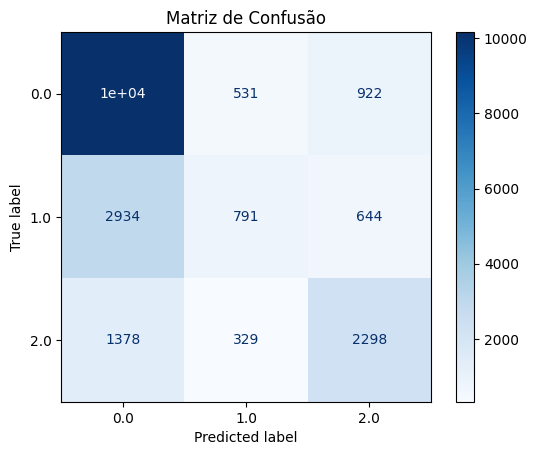

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gerar e exibir a matriz de confusão diretamente a partir do estimador
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test, cmap='Blues')
# Personalizar o gráfico
plt.title('Matriz de Confusão')
plt.show()

In [69]:
from sklearn.inspection import permutation_importance

In [70]:
# 7- Importância das features por permutação
# Obter o melhor modelo treinado do GridSearchCV
best_model = grid_search.best_estimator_

In [72]:
# Calcular a importância das features por permutação
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

In [73]:
# Obter as importâncias médias e o desvio padrão das importâncias
importances_mean = perm_importance.importances_mean
importances_std = perm_importance.importances_std
features = X_test.columns

In [74]:
# Obter as importâncias médias e o desvio padrão das importâncias
importance_vals = perm_importance.importances_mean
importance_std = perm_importance.importances_std
features = X_test.columns

In [75]:
# Ordenar as importâncias em ordem decrescente
indices = np.argsort(importance_vals)[::-1]

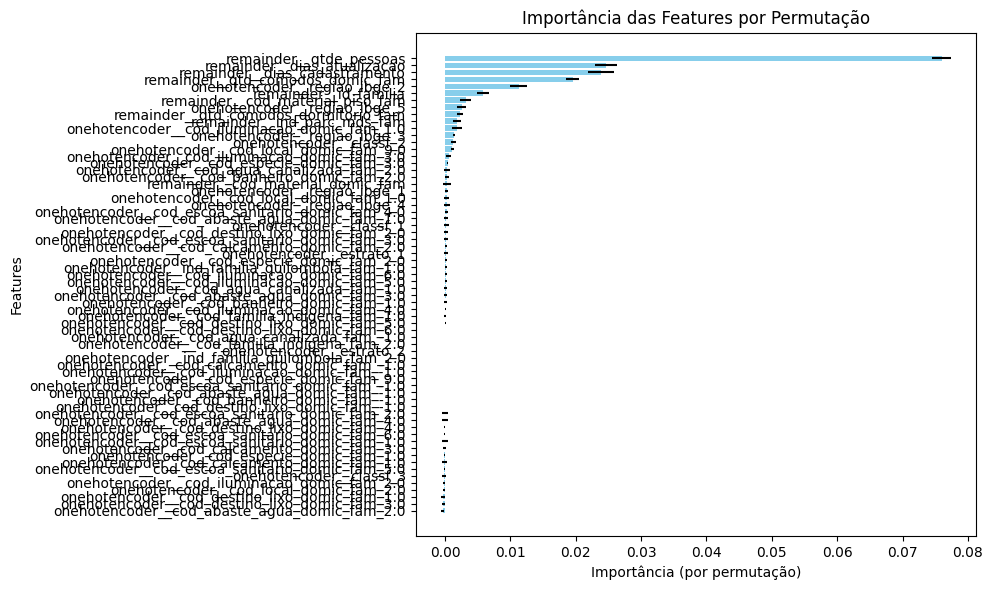

In [76]:
# Plotar a importância das features na horizontal com desvio padrão
plt.figure(figsize=(10, 6))
plt.title("Importância das Features por Permutação")
plt.barh(range(len(importance_vals)), importance_vals[indices], xerr=importance_std[indices], align="center", color='skyblue')
plt.yticks(range(len(importance_vals)), features[indices])
plt.gca().invert_yaxis()  # Inverter o eixo Y para que a feature mais importante fique no topo
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [77]:
# 7. Criar um DataFrame com as importâncias
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
})

# 8. Filtrar as features com importância maior que zero
important_features = importance_df[importance_df['Importance'] > 0.005]

# print("Features com importância maior que zero:")
# print(important_features)

# 9. Selecionar apenas as colunas importantes no conjunto de dados
X_train_filtered = X_train[important_features['Feature']]
X_test_filtered = X_test[important_features['Feature']]

# Grid Search com validação cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_filtered, y_train)

# Melhor modelo encontrado
gb_best = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")
# F1 score
y_pred = gb_best.predict(X_test_filtered)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

C:\Users\Admin\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores hiperparâmetros: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 2, 'xgb__n_estimators': 250}
F1 Score: 0.51
